In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Data_inc.csv')
df.head()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,Unnamed: 15
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,NaN


In [5]:
df.shape

(32561, 16)

In [6]:
df.describe()

,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week,Unnamed: 15
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,2.0
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,55000.0
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.0
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,55000.0
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,55000.0
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,55000.0
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,55000.0
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,55000.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               32561 non-null  int64  
 1   Profession Class  32561 non-null  object 
 2   Final_census      32561 non-null  int64  
 3    Education        32561 non-null  object 
 4    Education-num    32561 non-null  int64  
 5    marital-status   32561 non-null  object 
 6    occupation       32561 non-null  object 
 7    relationship     32561 non-null  object 
 8    race             32561 non-null  object 
 9   Gender            32561 non-null  object 
 10   capital-gain     32561 non-null  int64  
 11   capital-loss     32561 non-null  int64  
 12   hours-per-week   32561 non-null  int64  
 13   country          32561 non-null  object 
 14   income           32561 non-null  object 
 15  Unnamed: 15       2 non-null      float64
dtypes: float64(1), int64(6), object(9)
memor

In [8]:
#We can see that this 'Unnamed: 15' column is unwanted
#Lets dropo this column
#Before dropping, lets make a copy of the data so that original data is not disturbed

In [9]:
train=df.copy()

In [10]:
train=train.drop(['Unnamed: 15'],axis=1)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Profession Class  32561 non-null  object
 2   Final_census      32561 non-null  int64 
 3    Education        32561 non-null  object
 4    Education-num    32561 non-null  int64 
 5    marital-status   32561 non-null  object
 6    occupation       32561 non-null  object
 7    relationship     32561 non-null  object
 8    race             32561 non-null  object
 9   Gender            32561 non-null  object
 10   capital-gain     32561 non-null  int64 
 11   capital-loss     32561 non-null  int64 
 12   hours-per-week   32561 non-null  int64 
 13   country          32561 non-null  object
 14   income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
train.isnull().sum().sum()

0

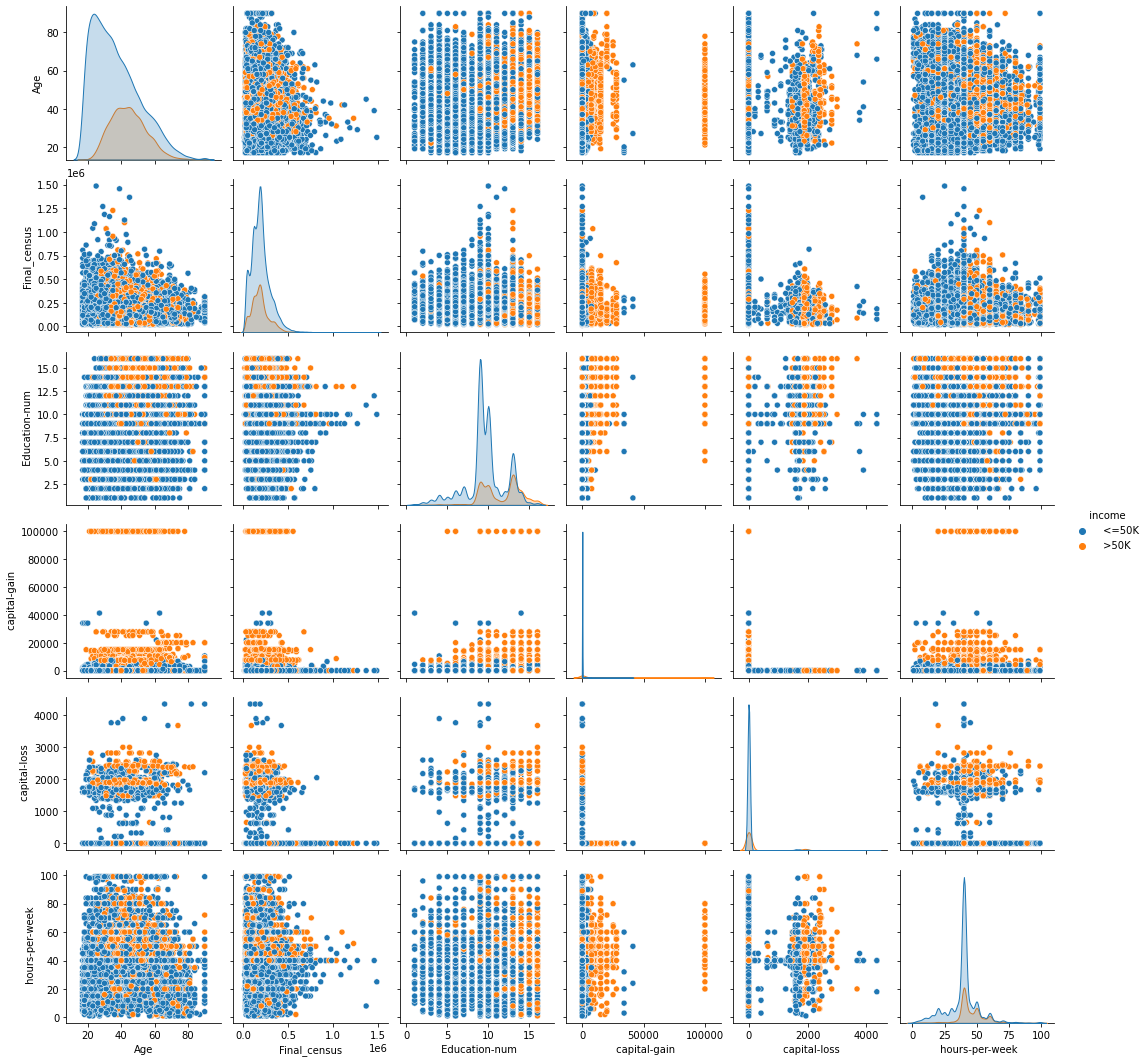

In [13]:
sns.pairplot(train,hue =' income')

#Examining Age

<AxesSubplot:xlabel=' income', ylabel='Age'>

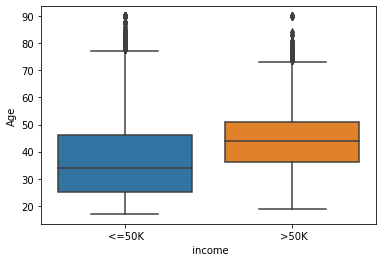

In [14]:
sns.boxplot(train[' income'],train['Age'])

In [15]:
#As age increses, probability of making more than 50k increases

<AxesSubplot:xlabel='Age', ylabel='Density'>

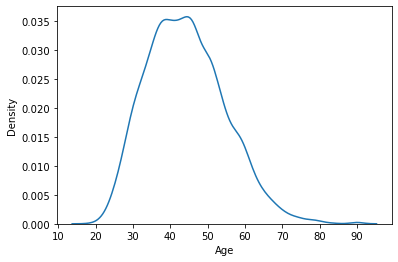

In [16]:
sns.kdeplot(train.Age[train[' income'] == ' >50K'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

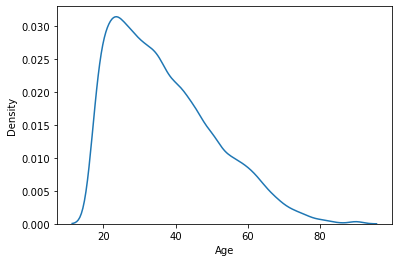

In [17]:
sns.kdeplot(train.Age[train[' income'] == ' <=50K'])

#Examining Profession Class

In [18]:
train['Profession Class'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [19]:
train['Profession Class'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Profession Class, dtype: int64

In [20]:
#Fill the question mark '?' with Mode of the data

In [21]:
train['Profession Class'].mask((train['Profession Class'].eq(" ?")),inplace=True)

In [22]:
train['Profession Class']=train['Profession Class'].fillna(train['Profession Class'].mode()[0])

In [23]:
train['Profession Class'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [24]:
train['Profession Class'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Profession Class, dtype: int64

<AxesSubplot:xlabel='Profession Class', ylabel='count'>

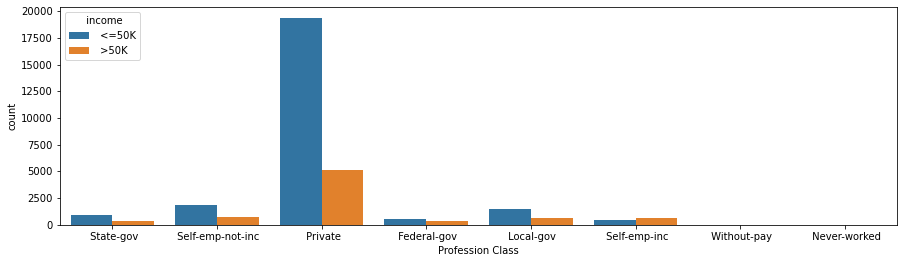

In [25]:
plt.figure(figsize=(15,4))
sns.countplot(train['Profession Class'], hue=train[' income'])

In [26]:
#Self Employed person has a higher chance of havig a salary higher than 50K

#Education

In [27]:
train[' Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name:  Education, dtype: int64

<AxesSubplot:xlabel=' Education', ylabel='count'>

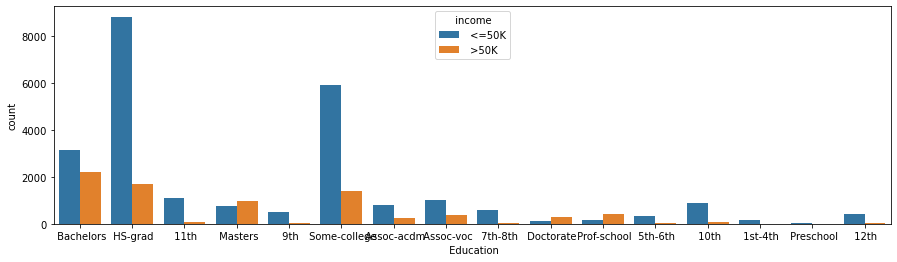

In [28]:
plt.figure(figsize=(15,4))
sns.countplot(train[' Education'], hue=train[' income'])

In [29]:
#The highest chances of havong income >=50K are in
#Prof-School
#Doctrate
#Masters
#Bachelors
#Assoc-Voc

In [30]:
train[[' Education',' Education-num']].drop_duplicates().sort_values(' Education-num',ascending = False)

,Education,Education-num
20,Doctorate,16
52,Prof-school,15
5,Masters,14
0,Bachelors,13
13,Assoc-acdm,12
14,Assoc-voc,11
10,Some-college,10
2,HS-grad,9
415,12th,8
3,11th,7


In [31]:
#Prof-School
#Doctrate
#Masters
#Bachelors
#Assoc-Voc
#All the above take longer duration of studying, and hence the higher salary

<AxesSubplot:xlabel=' income', ylabel=' Education-num'>

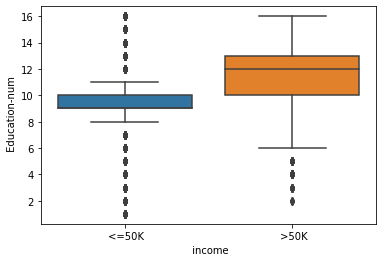

In [32]:
sns.boxplot(train[' income'],train[' Education-num'])

In [43]:
#So for 8-10 years of education, income is <50K
#For 10-13 years of education, income is >50K

#Also, there are outliers here
#But not interfering with them, because it is obvious that years of education can have great impact on income

In [44]:
#Also prima facie it is clear that their is collinearity in Education and Education-Num
#So we can use the Education-num and drop Education column

In [ ]:
train=train.drop(' Education', axis=1)

In [46]:
train.head()

,Age,Profession Class,Final_census,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,marital_status
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Not_Married
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Married
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Separated
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Married
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Married


#Marital Status

In [47]:
train[' marital-status'].value_counts()/32561*100

 Married-civ-spouse       45.993673
 Never-married            32.809189
 Divorced                 13.645158
 Separated                 3.147938
 Widowed                   3.049661
 Married-spouse-absent     1.283744
 Married-AF-spouse         0.070637
Name:  marital-status, dtype: float64

<AxesSubplot:xlabel=' marital-status', ylabel='count'>

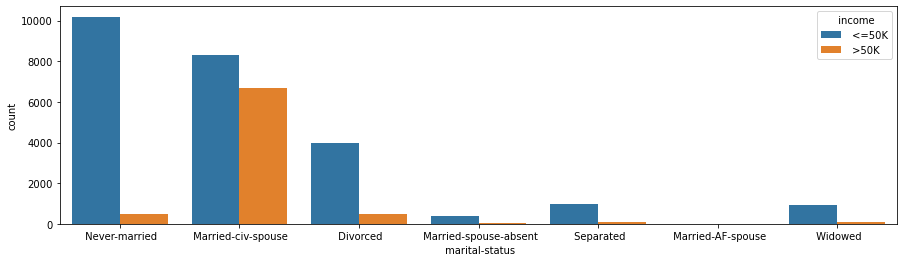

In [48]:
plt.figure(figsize=(15,4))
sns.countplot(train[' marital-status'], hue=train[' income'])

In [49]:
#Married-civ-spouse has higher chance of 50k+ income as compared to never married

In [50]:
#Since Divorced, Married-Spouse-Absent, Separated, Married-AF-Spouse and Widowed are all Similar categories
#We can simply convert them all to one category

In [51]:
train.loc[(train[' marital-status'] == ' Married-civ-spouse'),'marital_status'] = 'Married'
train.loc[(train[' marital-status'] == ' Married-AF-spouse'),'marital_status'] = 'Separated'
train.loc[(train[' marital-status'] == ' Never-married'),'marital_status'] = 'Not_Married'
train.loc[(train[' marital-status'] == ' Divorced'),'marital_status'] = 'Separated'
train.loc[(train[' marital-status'] == ' Married-spouse-absent'),'marital_status'] = 'Separated'
train.loc[(train[' marital-status'] == ' Separated'),'marital_status'] = 'Separated'
train.loc[(train[' marital-status'] == ' Widowed'),'marital_status'] = 'Separated'

In [52]:
train.head()

,Age,Profession Class,Final_census,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,marital_status
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Not_Married
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Married
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Separated
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Married
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Married


In [53]:
train.shape

(32561, 15)

In [54]:
#We can now drop the older column marital-status and use the new and simpler marital_status
train=train.drop(' marital-status', axis=1)

In [55]:
train.shape

(32561, 14)

#Occupation

In [56]:
train[' occupation'].value_counts()/32561*100

 Prof-specialty       12.714597
 Craft-repair         12.588680
 Exec-managerial      12.487331
 Adm-clerical         11.578268
 Sales                11.209729
 Other-service        10.119468
 Machine-op-inspct     6.148460
 ?                     5.660146
 Transport-moving      4.904641
 Handlers-cleaners     4.207487
 Farming-fishing       3.052732
 Tech-support          2.850035
 Protective-serv       1.993182
 Priv-house-serv       0.457603
 Armed-Forces          0.027640
Name:  occupation, dtype: float64

In [57]:
#Fill the question mark '?' with Mode of the data

In [58]:
train[' occupation'].mask((train[' occupation'].eq(" ?")),inplace=True)

In [59]:
train[' occupation']=train[' occupation'].fillna(train[' occupation'].mode()[0])

In [60]:
train[' occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [61]:
train[' occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name:  occupation, dtype: int64

<AxesSubplot:xlabel=' occupation', ylabel='count'>

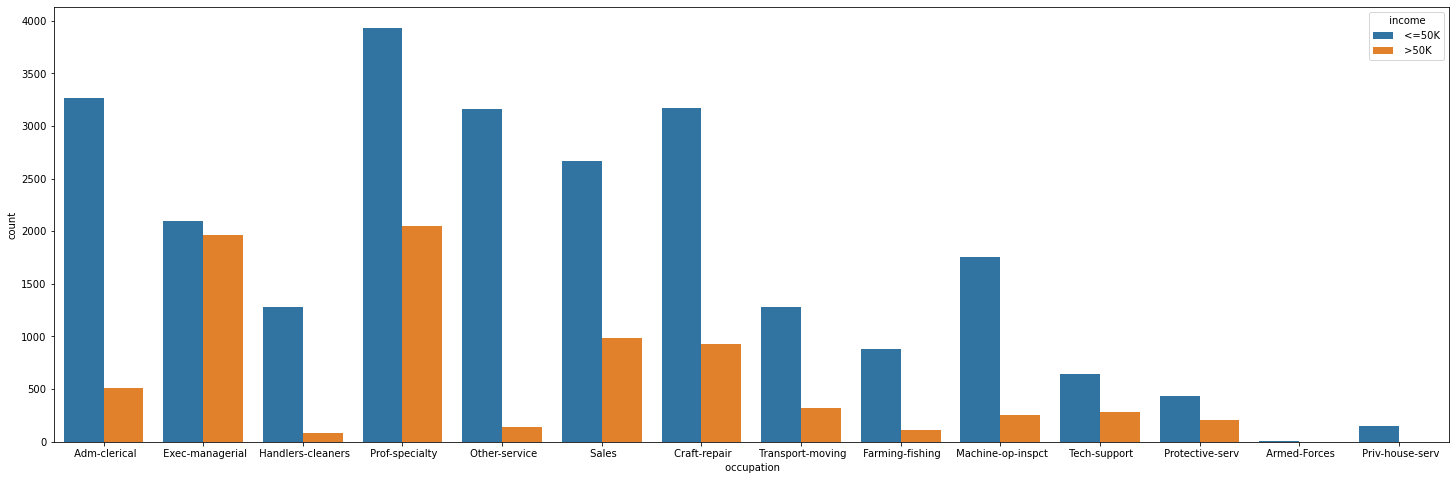

In [62]:
plt.figure(figsize=(25,8))
sns.countplot(train[' occupation'], hue=train[' income'])

#Relationship

In [63]:
train[' relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name:  relationship, dtype: int64

<AxesSubplot:xlabel=' relationship', ylabel='count'>

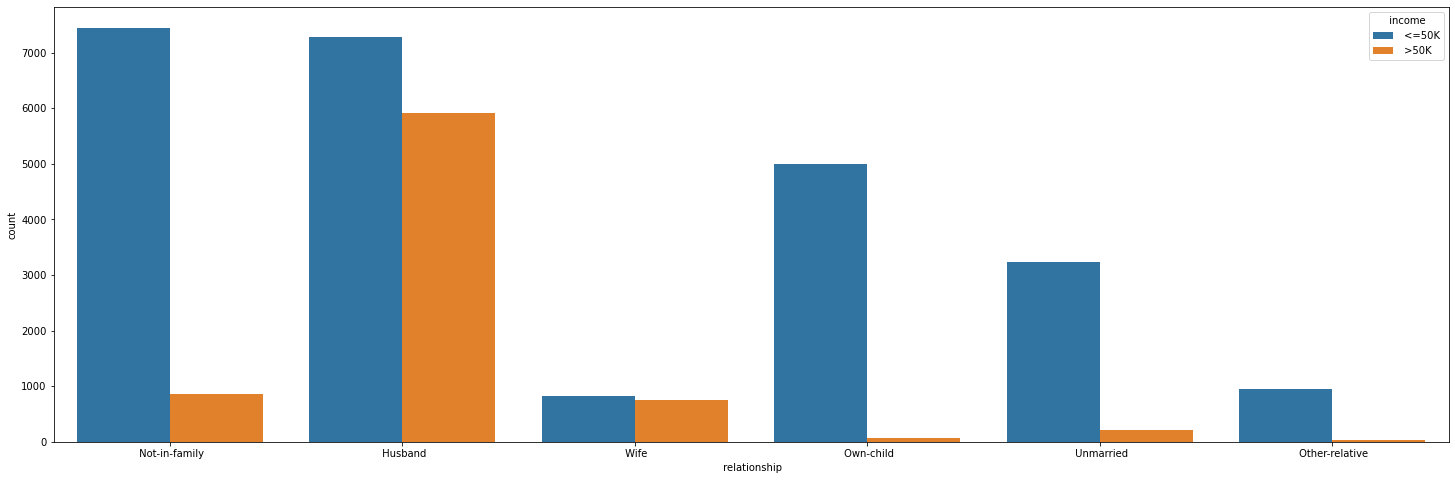

In [64]:
plt.figure(figsize=(25,8))
sns.countplot(train[' relationship'], hue=train[' income'])

In [65]:
#Husband and Wife particularly have a higher chance of having >50K income

#Race

In [66]:
train[' race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name:  race, dtype: int64

<AxesSubplot:xlabel=' race', ylabel='count'>

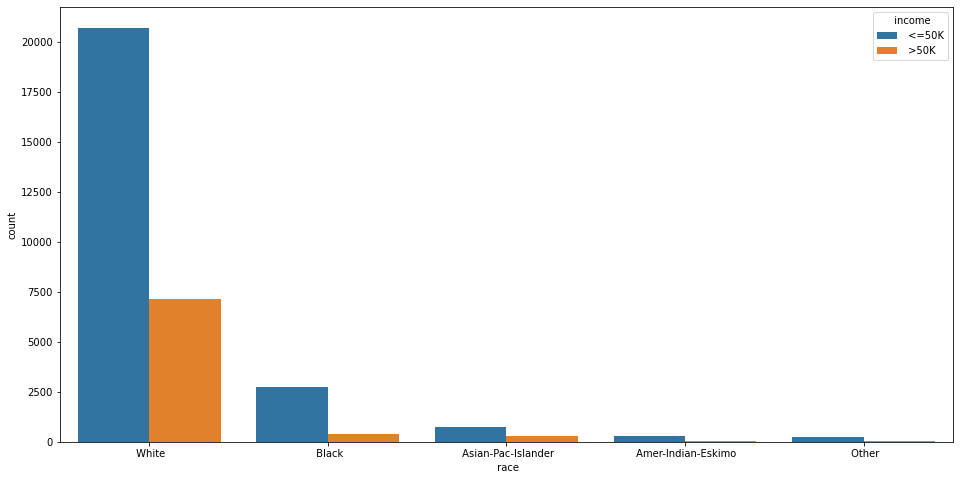

In [67]:
plt.figure(figsize=(16,8))
sns.countplot(train[' race'], hue=train[' income'])

In [68]:
#Asian-Pac-Islander have a higher chance of having >50K income
#Whites have a higher chance of having >50K income
#Also the data is unbalnced(oversampling of one class(White))

In [69]:
train['Gender'].value_counts()

 Male      21790
 Female    10771
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

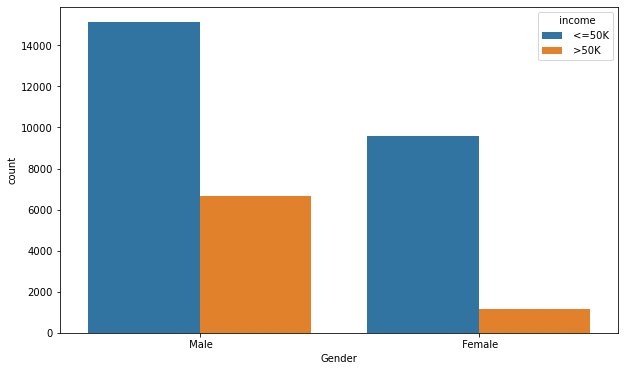

In [70]:
plt.figure(figsize=(10,6))
sns.countplot(train['Gender'], hue=train[' income'])

In [71]:
#Males have a higher chance of having >50K income

#Capital Gains

In [72]:
train[' capital-gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name:  capital-gain, Length: 119, dtype: int64

In [73]:
#As we can see, 29849 people out of 31561 people do not have any capital gains
#Most people do not invest in instruments that can yield capital gains

In [74]:
np.sum(train[' capital-gain']>0)

2712

<AxesSubplot:xlabel=' capital-gain', ylabel='count'>

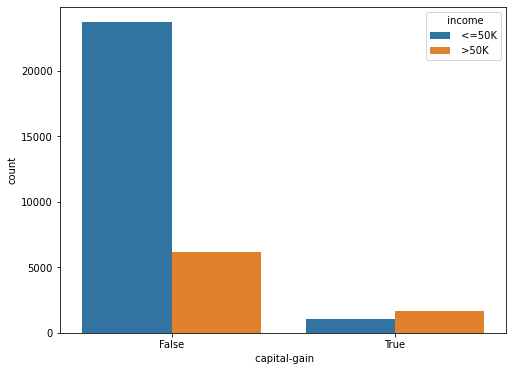

In [75]:
plt.figure(figsize=(8,6))
sns.countplot((train[' capital-gain']>0), hue=train[' income'])

In [76]:
#So when capital gains > 0, The chances of having income >50K are higher than that of having income <=50K
#In case of 0 capital gains, the situation is vice versa

#Capital Loss

In [77]:
train[' capital-loss'].value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name:  capital-loss, Length: 92, dtype: int64

In [78]:
np.sum(train[' capital-loss']>0)

1519

In [79]:
#Only 1519 people have registered a Capital Loss

<AxesSubplot:xlabel=' capital-loss', ylabel='count'>

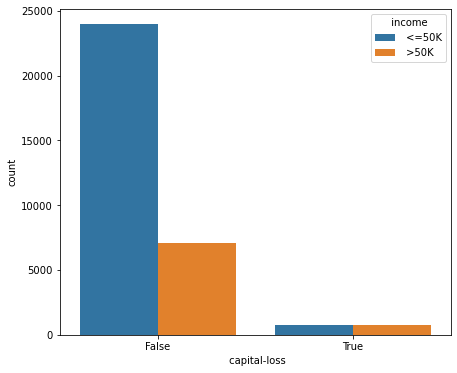

In [80]:
plt.figure(figsize=(7,6))
sns.countplot((train[' capital-loss']>0), hue=train[' income'])

In [81]:
#This is an interesting finding
#Even after capital Loss greater than 0, chances of having income >50K are higher
#This may be because, mostly only those people are taking the risk of investing in instruments that can lead to capital loss
#Who already have a high salary

In [82]:
#We can create a new column that tells about how many people actually invest in instruments that can lead to capital gain or loss
#These investors have a higher chance of having income >50K
#This column will help a build a better ML Model and we shall use this column instead of capital-gain and capital-loss

In [83]:
train['investment'] = 0
train.loc[(train[' capital-loss']>0) | (train[' capital-gain']>0),'investment'] = 1

In [84]:
train=train.drop(' capital-gain', axis=1)

In [85]:
train=train.drop(' capital-loss', axis=1)

In [86]:
train.head()

,Age,Profession Class,Final_census,Education-num,occupation,relationship,race,Gender,hours-per-week,country,income,marital_status,investment
0,39,State-gov,77516,13,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,Not_Married,1
1,50,Self-emp-not-inc,83311,13,Exec-managerial,Husband,White,Male,13,United-States,<=50K,Married,0
2,38,Private,215646,9,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,Separated,0
3,53,Private,234721,7,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,Married,0
4,28,Private,338409,13,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,Married,0


#Hours Per Week

<AxesSubplot:xlabel=' income', ylabel=' hours-per-week'>

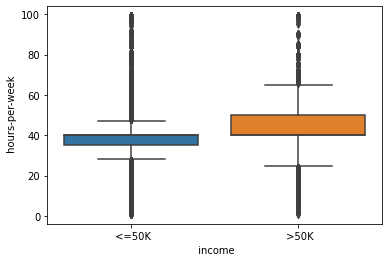

In [87]:
sns.boxplot(train[' income'],train[' hours-per-week'])

In [88]:
#If hours per week is high than chances of having a salary higher than 50K are high
#Also, there are outliers but not touching them bc they greatly influence income

<AxesSubplot:xlabel=' hours-per-week', ylabel='Density'>

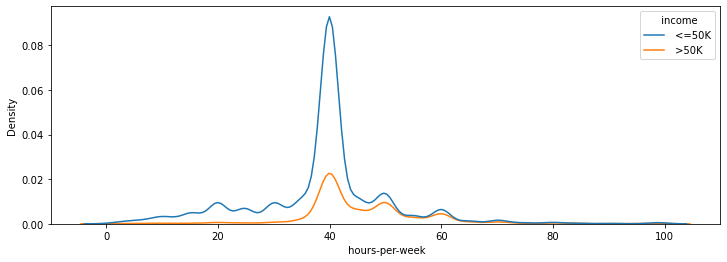

In [89]:
plt.figure(figsize=(12,4))
sns.kdeplot((train[' hours-per-week']), hue=train[' income'])

#Country

In [90]:
train[' country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [91]:
#Since this data is basically United States Data
#Other classes are just minority classes
#lets fill the unkown values, aimply with United States

train[' country'] = train[' country'].str.strip()

In [92]:
train[' country'].mask((train[' country'].eq(" ?")),inplace=True)

In [93]:
train[' country']=train[' country'].fillna(train[' country'].mode()[0])

In [94]:
#Since incomes are generally higher in the west than the rest,
#We can simply convert the data to West and Rest

In [95]:
country_data = {'COUNTRY': ['United-States', 'Mexico', 'Philippines', 'Germany', 'Canada', 'Puerto-Rico', 'El-Salvador', 'India', 'Cuba', 'England', 'Jamaica', 'South', 'China', 'Italy', 'Dominican-Republic', 'Vietnam', 'Guatemala', 'Japan', 'Poland', 'Columbia', 'Taiwan', 'Haiti', 'Iran', 'Portugal', 'Nicaragua', 'Peru', 'Greece', 'France', 'Ecuador', 'Ireland', 'Hong', 'Trinadad&Tobago', 'Cambodia', 'Thailand', 'Laos', 'Yugoslavia', 'Outlying-US(Guam-USVI-etc)', 'Honduras', 'Hungary', 'Scotland', 'Holand-Netherlands'], 
     'NCountry': ['West', 'Rest', 'Rest', 'West', 'West', 'Rest', 'Rest', 'Rest', 'Rest', 'West', 'Rest', 'Rest', 'Rest', 'West', 'Rest', 'Rest', 'Rest', 'West', 'West', 'Rest', 'West', 'Rest', 'Rest', 'West', 'Rest', 'Rest', 'West', 'West', 'Rest', 'West', 'West', 'Rest', 'Rest', 'Rest', 'Rest', 'West', 'West', 'Rest', 'West', 'West', 'West']}
Country = pd.DataFrame(data=country_data)
Country

,COUNTRY,NCountry
0,United-States,West
1,Mexico,Rest
2,Philippines,Rest
3,Germany,West
4,Canada,West
5,Puerto-Rico,Rest
6,El-Salvador,Rest
7,India,Rest
8,Cuba,Rest
9,England,West


In [96]:
train = train.join(Country.set_index('COUNTRY'), on=' country')

<AxesSubplot:xlabel=' income', ylabel='count'>

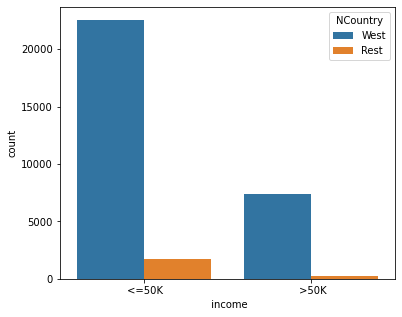

In [97]:
plt.figure(figsize=(6,5))
sns.countplot((train[' income']), hue=train['NCountry'])

In [98]:
train=train.drop(' country', axis=1)

In [99]:
#Creating a new and target column

sal = train[' income'] == ' >50K'
sal = sal*1
train['salary'] = sal

In [100]:
train=train.drop(' income', axis=1)

In [101]:
train.head()

,Age,Profession Class,Final_census,Education-num,occupation,relationship,race,Gender,hours-per-week,marital_status,investment,NCountry,salary
0,39,State-gov,77516,13,Adm-clerical,Not-in-family,White,Male,40,Not_Married,1,West,0
1,50,Self-emp-not-inc,83311,13,Exec-managerial,Husband,White,Male,13,Married,0,West,0
2,38,Private,215646,9,Handlers-cleaners,Not-in-family,White,Male,40,Separated,0,West,0
3,53,Private,234721,7,Handlers-cleaners,Husband,Black,Male,40,Married,0,West,0
4,28,Private,338409,13,Prof-specialty,Wife,Black,Female,40,Married,0,Rest,0


In [177]:
train.to_csv('Calibrated_Data.csv')

#Getting Dummies

In [102]:
train1=train.copy()

In [103]:
train3=pd.get_dummies(train1, columns=['Profession Class',' occupation',' relationship',' race','Gender','marital_status','NCountry'])

In [104]:
train3.head()

,Age,Final_census,Education-num,hours-per-week,investment,salary,Profession Class_ Federal-gov,Profession Class_ Local-gov,Profession Class_ Never-worked,Profession Class_ Private,...,race_ Black,race_ Other,race_ White,Gender_ Female,Gender_ Male,marital_status_Married,marital_status_Not_Married,marital_status_Separated,NCountry_Rest,NCountry_West
0,39,77516,13,40,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
1,50,83311,13,13,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,1
2,38,215646,9,40,0,0,0,0,0,1,...,0,0,1,0,1,0,0,1,0,1
3,53,234721,7,40,0,0,0,0,0,1,...,1,0,0,0,1,1,0,0,0,1
4,28,338409,13,40,0,0,0,0,0,1,...,1,0,0,1,0,1,0,0,1,0


In [105]:
train3=train3.drop('Profession Class_ Federal-gov',axis=1)
train3=train3.drop(' occupation_ Sales',axis=1)
train3=train3.drop(' relationship_ Other-relative',axis=1)
train3=train3.drop(' race_ Other',axis=1)
train3=train3.drop('Gender_ Female',axis=1)
train3=train3.drop('marital_status_Separated',axis=1)
train3=train3.drop('NCountry_Rest',axis=1)

In [106]:
train3.shape

(32561, 39)

#Correlation

In [107]:
cor=train3.corr()

<AxesSubplot:>

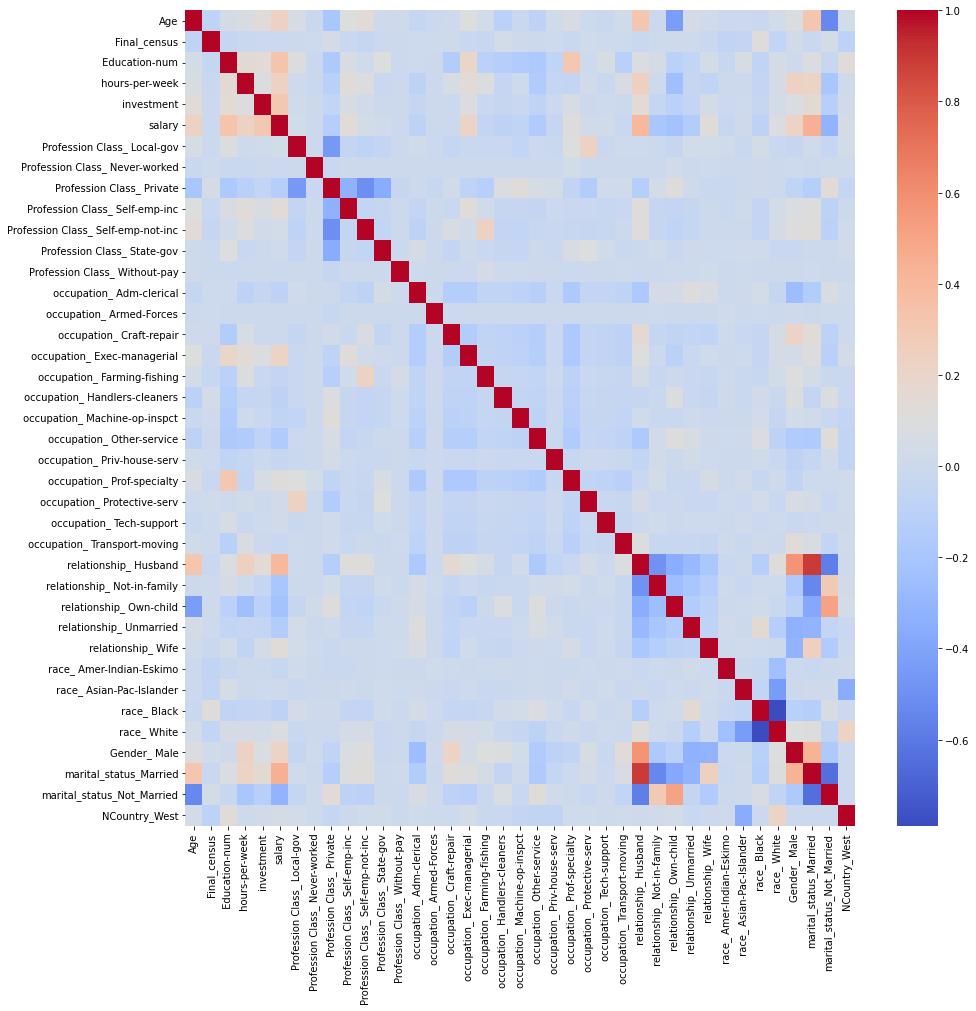

In [108]:
plt.figure(figsize=(15,15))
sns.heatmap(cor,cmap="coolwarm")

In [109]:
# creation of dependent , independent variable
X=train3.drop(['salary'],axis=1)
Y=train3['salary']

#Scaling

In [110]:
from sklearn.preprocessing import MinMaxScaler

In [111]:
scale=MinMaxScaler()
X_scaled=scale.fit_transform(X)

In [112]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

In [113]:
X_scaled.head()

,Age,Final_census,Education-num,hours-per-week,investment,Profession Class_ Local-gov,Profession Class_ Never-worked,Profession Class_ Private,Profession Class_ Self-emp-inc,Profession Class_ Self-emp-not-inc,...,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ White,Gender_ Male,marital_status_Married,marital_status_Not_Married,NCountry_West
0,0.301370,0.044302,0.800000,0.397959,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
1,0.452055,0.048238,0.800000,0.122449,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,0.287671,0.138113,0.533333,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.493151,0.151068,0.400000,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
4,0.150685,0.221488,0.800000,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [114]:
#Since Final_census is the total size of the sample
#It can used as a weight

#Creating a new database where Final_census is used as a weight
df=train.copy()

In [115]:
weight=X_scaled['Final_census'].tolist()
X_scaled=X_scaled.mul(weight,axis=0)

In [116]:
#Since we are using Final_census as a weight, we can drop it from the dataframe
X_scaled=X_scaled.drop('Final_census',axis=1)

In [117]:
X_scaled.head()

,Age,Education-num,hours-per-week,investment,Profession Class_ Local-gov,Profession Class_ Never-worked,Profession Class_ Private,Profession Class_ Self-emp-inc,Profession Class_ Self-emp-not-inc,Profession Class_ State-gov,...,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ White,Gender_ Male,marital_status_Married,marital_status_Not_Married,NCountry_West
0,0.013351,0.035442,0.017630,0.044302,0.0,0.0,0.000000,0.0,0.000000,0.044302,...,0.0,0.000000,0.0,0.0,0.000000,0.044302,0.044302,0.000000,0.044302,0.044302
1,0.021806,0.038590,0.005907,0.000000,0.0,0.0,0.000000,0.0,0.048238,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.048238,0.048238,0.048238,0.000000,0.048238
2,0.039731,0.073661,0.054964,0.000000,0.0,0.0,0.138113,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.138113,0.138113,0.000000,0.000000,0.138113
3,0.074499,0.060427,0.060119,0.000000,0.0,0.0,0.151068,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.151068,0.000000,0.151068,0.151068,0.000000,0.151068
4,0.033375,0.177191,0.088143,0.000000,0.0,0.0,0.221488,0.0,0.000000,0.000000,...,0.0,0.221488,0.0,0.0,0.221488,0.000000,0.000000,0.221488,0.000000,0.000000


# Model  Building

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from xgboost import XGBClassifier

#for model evaluation
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [119]:
LR=LogisticRegression()
KNN=KNeighborsClassifier()
svc=SVC() 
DT=DecisionTreeClassifier()
gnb=GaussianNB()
bn=BernoulliNB()



rf=RandomForestClassifier()
bag=BaggingClassifier()
gb=GradientBoostingClassifier()
ad=AdaBoostClassifier()
xg=XGBClassifier()

In [120]:
# train test split
from sklearn.model_selection import train_test_split

In [121]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=99,stratify=Y)

#Logistic Regression

In [122]:
LR.fit(X_train,Y_train)

LogisticRegression()

In [123]:
Y_pred_LR=LR.predict(X_test)

In [124]:
# evaluate the performance
accuracy_score(Y_test,Y_pred_LR)

0.8185168125287886

In [125]:
confusion_matrix(Y_test,Y_pred_LR)

array([[4745,  200],
       [ 982,  586]], dtype=int64)

In [126]:
print(classification_report(Y_test,Y_pred_LR))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4945
           1       0.75      0.37      0.50      1568

    accuracy                           0.82      6513
   macro avg       0.79      0.67      0.69      6513
weighted avg       0.81      0.82      0.80      6513



#KNN

In [127]:
KNN.fit(X_train,Y_train)

KNeighborsClassifier()

In [128]:
Y_pred_KNN=KNN.predict(X_test)

In [131]:
# evaluate the performance
accuracy_score(Y_test,Y_pred_KNN)

0.8146783356364194

In [132]:
confusion_matrix(Y_test,Y_pred_KNN)

array([[4410,  535],
       [ 672,  896]], dtype=int64)

In [133]:
print(classification_report(Y_test,Y_pred_KNN))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4945
           1       0.63      0.57      0.60      1568

    accuracy                           0.81      6513
   macro avg       0.75      0.73      0.74      6513
weighted avg       0.81      0.81      0.81      6513



#SVC

In [134]:
svc.fit(X_train,Y_train)

SVC()

In [135]:
Y_pred_svc=svc.predict(X_test)

In [136]:
# evaluate the performance
accuracy_score(Y_test,Y_pred_svc)

0.8372485797635498

In [137]:
confusion_matrix(Y_test,Y_pred_svc)

array([[4637,  308],
       [ 752,  816]], dtype=int64)

In [138]:
print(classification_report(Y_test,Y_pred_svc))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4945
           1       0.73      0.52      0.61      1568

    accuracy                           0.84      6513
   macro avg       0.79      0.73      0.75      6513
weighted avg       0.83      0.84      0.83      6513



#Naive Bayes

In [139]:
gnb.fit(X_train,Y_train)

GaussianNB()

In [140]:
Y_pred_gnb=gnb.predict(X_test)

In [141]:
# evaluate the performance
accuracy_score(Y_test,Y_pred_gnb)

0.47735298633502227

In [142]:
confusion_matrix(Y_test,Y_pred_gnb)

array([[1603, 3342],
       [  62, 1506]], dtype=int64)

In [143]:
print(classification_report(Y_test,Y_pred_gnb))

              precision    recall  f1-score   support

           0       0.96      0.32      0.49      4945
           1       0.31      0.96      0.47      1568

    accuracy                           0.48      6513
   macro avg       0.64      0.64      0.48      6513
weighted avg       0.81      0.48      0.48      6513



In [144]:
#Although low accuracy, but GNB has an exceptionaly high recall for 1 (Income >50K)

#Bernaulli Naive Bayes

In [145]:
bn.fit(X_train,Y_train)
Y_pred_bn=bn.predict(X_test)
print(accuracy_score(Y_test,Y_pred_bn))
print('--------------------------------------------------------')
print(confusion_matrix(Y_test,Y_pred_bn))
print('--------------------------------------------------------')
print(classification_report(Y_test,Y_pred_bn))

0.7379087977890373
--------------------------------------------------------
[[3556 1389]
 [ 318 1250]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      4945
           1       0.47      0.80      0.59      1568

    accuracy                           0.74      6513
   macro avg       0.70      0.76      0.70      6513
weighted avg       0.81      0.74      0.76      6513



#Decision Tree

In [146]:
DT.fit(X_train,Y_train)
Y_pred_dt=DT.predict(X_test)
print(accuracy_score(Y_test,Y_pred_dt))
print('--------------------------------------------------------')
print(confusion_matrix(Y_test,Y_pred_dt))
print('--------------------------------------------------------')
print(classification_report(Y_test,Y_pred_dt))

0.7875019192384461
--------------------------------------------------------
[[4237  708]
 [ 676  892]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4945
           1       0.56      0.57      0.56      1568

    accuracy                           0.79      6513
   macro avg       0.71      0.71      0.71      6513
weighted avg       0.79      0.79      0.79      6513



In [147]:
#Lets try applying the ML Algos on balanced data
#Balance using NearMiss
!pip install imblearn
from imblearn.under_sampling import NearMiss

In [148]:
nm=NearMiss()
X_train_nm,Y_train_nm=nm.fit_resample(X_train,Y_train)
Y_train_nm.value_counts()

0    6273
1    6273
Name: salary, dtype: int64

In [149]:
#SVC
svc.fit(X_train_nm,Y_train_nm)
Y_pred_svc1=svc.predict(X_test)
print(accuracy_score(Y_test,Y_pred_svc1))
print('--------------------------------------------------------')
print(confusion_matrix(Y_test,Y_pred_svc1))
print('--------------------------------------------------------')
print(classification_report(Y_test,Y_pred_svc1))

0.5773069246123138
--------------------------------------------------------
[[2615 2330]
 [ 423 1145]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.53      0.66      4945
           1       0.33      0.73      0.45      1568

    accuracy                           0.58      6513
   macro avg       0.60      0.63      0.55      6513
weighted avg       0.73      0.58      0.61      6513



In [150]:
#DT
DT.fit(X_train_nm,Y_train_nm)
Y_pred_DT1=DT.predict(X_test)
print(accuracy_score(Y_test,Y_pred_DT1))
print('--------------------------------------------------------')
print(confusion_matrix(Y_test,Y_pred_DT1))
print('--------------------------------------------------------')
print(classification_report(Y_test,Y_pred_DT1))

0.5475203439275296
--------------------------------------------------------
[[2457 2488]
 [ 459 1109]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.50      0.63      4945
           1       0.31      0.71      0.43      1568

    accuracy                           0.55      6513
   macro avg       0.58      0.60      0.53      6513
weighted avg       0.71      0.55      0.58      6513



In [151]:
#LR
LR.fit(X_train_nm,Y_train_nm)
Y_pred_LR1=LR.predict(X_test)
print(accuracy_score(Y_test,Y_pred_LR1))
print('--------------------------------------------------------')
print(confusion_matrix(Y_test,Y_pred_LR1))
print('--------------------------------------------------------')
print(classification_report(Y_test,Y_pred_LR1))

0.717948717948718
--------------------------------------------------------
[[3650 1295]
 [ 542 1026]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.74      0.80      4945
           1       0.44      0.65      0.53      1568

    accuracy                           0.72      6513
   macro avg       0.66      0.70      0.66      6513
weighted avg       0.77      0.72      0.73      6513



In [152]:
#GNB
gnb.fit(X_train_nm,Y_train_nm)
Y_pred_gnb1=svc.predict(X_test)
print(accuracy_score(Y_test,Y_pred_gnb1))
print('--------------------------------------------------------')
print(confusion_matrix(Y_test,Y_pred_gnb1))
print('--------------------------------------------------------')
print(classification_report(Y_test,Y_pred_gnb1))

0.5773069246123138
--------------------------------------------------------
[[2615 2330]
 [ 423 1145]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.53      0.66      4945
           1       0.33      0.73      0.45      1568

    accuracy                           0.58      6513
   macro avg       0.60      0.63      0.55      6513
weighted avg       0.73      0.58      0.61      6513



In [153]:
#KNN
KNN.fit(X_train_nm,Y_train_nm)
Y_pred_KNN1=svc.predict(X_test)
print(accuracy_score(Y_test,Y_pred_KNN1))
print('--------------------------------------------------------')
print(confusion_matrix(Y_test,Y_pred_KNN1))
print('--------------------------------------------------------')
print(classification_report(Y_test,Y_pred_KNN1))

0.5773069246123138
--------------------------------------------------------
[[2615 2330]
 [ 423 1145]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.53      0.66      4945
           1       0.33      0.73      0.45      1568

    accuracy                           0.58      6513
   macro avg       0.60      0.63      0.55      6513
weighted avg       0.73      0.58      0.61      6513



In [154]:
#RF
rf.fit(X_train_nm,Y_train_nm)
Y_pred_rf1=rf.predict(X_test)
print(accuracy_score(Y_test,Y_pred_rf1))
print('--------------------------------------------------------')
print(confusion_matrix(Y_test,Y_pred_rf1))
print('--------------------------------------------------------')
print(classification_report(Y_test,Y_pred_rf1))

0.5263319514816521
--------------------------------------------------------
[[2219 2726]
 [ 359 1209]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.45      0.59      4945
           1       0.31      0.77      0.44      1568

    accuracy                           0.53      6513
   macro avg       0.58      0.61      0.51      6513
weighted avg       0.73      0.53      0.55      6513



In [155]:
#Bagging
bag.fit(X_train_nm,Y_train_nm)
Y_pred_bag1=bag.predict(X_test)
print(accuracy_score(Y_test,Y_pred_bag1))
print('--------------------------------------------------------')
print(confusion_matrix(Y_test,Y_pred_bag1))
print('--------------------------------------------------------')
print(classification_report(Y_test,Y_pred_bag1))

0.5857515737755259
--------------------------------------------------------
[[2690 2255]
 [ 443 1125]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.54      0.67      4945
           1       0.33      0.72      0.45      1568

    accuracy                           0.59      6513
   macro avg       0.60      0.63      0.56      6513
weighted avg       0.73      0.59      0.62      6513



In [156]:
#Same bagging algo with unbalanced data
bag.fit(X_train,Y_train)
Y_pred_bag2=bag.predict(X_test)
print(accuracy_score(Y_test,Y_pred_bag2))
print('--------------------------------------------------------')
print(confusion_matrix(Y_test,Y_pred_bag2))
print('--------------------------------------------------------')
print(classification_report(Y_test,Y_pred_bag2))

0.8252725318593582
--------------------------------------------------------
[[4540  405]
 [ 733  835]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4945
           1       0.67      0.53      0.59      1568

    accuracy                           0.83      6513
   macro avg       0.77      0.73      0.74      6513
weighted avg       0.82      0.83      0.82      6513



In [157]:
#Gradient Boosting
gb.fit(X_train_nm,Y_train_nm)
Y_pred_gb1=bag.predict(X_test)
print(accuracy_score(Y_test,Y_pred_gb1))
print('--------------------------------------------------------')
print(confusion_matrix(Y_test,Y_pred_gb1))
print('--------------------------------------------------------')
print(classification_report(Y_test,Y_pred_gb1))

0.8252725318593582
--------------------------------------------------------
[[4540  405]
 [ 733  835]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4945
           1       0.67      0.53      0.59      1568

    accuracy                           0.83      6513
   macro avg       0.77      0.73      0.74      6513
weighted avg       0.82      0.83      0.82      6513



In [204]:
#Same gradient boosting algo with unbalanced data
gb.fit(X_train,Y_train)
Y_pred_gb2=bag.predict(X_test)
print(accuracy_score(Y_test,Y_pred_gb2))
print('--------------------------------------------------------')
print(confusion_matrix(Y_test,Y_pred_gb2))
print('--------------------------------------------------------')
print(classification_report(Y_test,Y_pred_gb2))

0.8226623675725472
--------------------------------------------------------
[[4531  414]
 [ 741  827]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4945
           1       0.67      0.53      0.59      1568

    accuracy                           0.82      6513
   macro avg       0.76      0.72      0.74      6513
weighted avg       0.81      0.82      0.82      6513



In [158]:
#Ada Boosting
ad.fit(X_train_nm,Y_train_nm)
Y_pred_ad1=ad.predict(X_test)
print(accuracy_score(Y_test,Y_pred_ad1))
print('--------------------------------------------------------')
print(confusion_matrix(Y_test,Y_pred_ad1))
print('--------------------------------------------------------')
print(classification_report(Y_test,Y_pred_ad1))

0.5806847842775986
--------------------------------------------------------
[[2648 2297]
 [ 434 1134]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.54      0.66      4945
           1       0.33      0.72      0.45      1568

    accuracy                           0.58      6513
   macro avg       0.59      0.63      0.56      6513
weighted avg       0.73      0.58      0.61      6513



In [159]:
#Same gradient boosting algo with unbalanced data
ad.fit(X_train,Y_train)
Y_pred_ad2=ad.predict(X_test)
print(accuracy_score(Y_test,Y_pred_ad2))
print('--------------------------------------------------------')
print(confusion_matrix(Y_test,Y_pred_ad2))
print('--------------------------------------------------------')
print(classification_report(Y_test,Y_pred_ad2))

0.8304928604329802
--------------------------------------------------------
[[4536  409]
 [ 695  873]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4945
           1       0.68      0.56      0.61      1568

    accuracy                           0.83      6513
   macro avg       0.77      0.74      0.75      6513
weighted avg       0.82      0.83      0.82      6513



In [160]:
#XG Boosting
xg.fit(X_train_nm,Y_train_nm)
Y_pred_xg1=xg.predict(X_test)
print(accuracy_score(Y_test,Y_pred_xg1))
print('--------------------------------------------------------')
print(confusion_matrix(Y_test,Y_pred_xg1))
print('--------------------------------------------------------')
print(classification_report(Y_test,Y_pred_xg1))

0.5544296023337939
--------------------------------------------------------
[[2397 2548]
 [ 354 1214]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.48      0.62      4945
           1       0.32      0.77      0.46      1568

    accuracy                           0.55      6513
   macro avg       0.60      0.63      0.54      6513
weighted avg       0.74      0.55      0.58      6513



In [161]:
#Same gradient boosting algo with unbalanced data
xg.fit(X_train,Y_train)
Y_pred_xg2=xg.predict(X_test)
print(accuracy_score(Y_test,Y_pred_xg2))
print('--------------------------------------------------------')
print(confusion_matrix(Y_test,Y_pred_xg2))
print('--------------------------------------------------------')
print(classification_report(Y_test,Y_pred_xg2))

0.8409335175802242
--------------------------------------------------------
[[4539  406]
 [ 630  938]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4945
           1       0.70      0.60      0.64      1568

    accuracy                           0.84      6513
   macro avg       0.79      0.76      0.77      6513
weighted avg       0.83      0.84      0.84      6513



In [162]:
#We can see that both Gradient Boosting and Xtreme Gradient Boosting are giving better results with unbalanced data
#This may be because of overfitting in the case of minority class (income >50K) when we use balanced data
#(In balanced data, there are considerably more instances of minority class as compared to unbalanced data)

In [163]:
#Cross Validating XGBoosting
from sklearn.model_selection import cross_val_score

In [164]:
cross_val_xg=cross_val_score(estimator=xg,X=X,y=Y,cv=10,n_jobs=-1)
cross_val_xg

array([0.84464231, 0.84643735, 0.84766585, 0.83599509, 0.84213759,
       0.8458231 , 0.85165848, 0.85104423, 0.84459459, 0.8495086 ])

In [165]:
print("Cross validation XG mean accuracy",cross_val_xg.mean())

Cross validation XG mean accuracy 0.8459507173738061


In [166]:
#Lets see the accuracy for balanced data as well
cross_val_xg1=cross_val_score(estimator=xg,X=X_train_nm,y=Y_train_nm,cv=10,n_jobs=-1)
cross_val_xg1

array([0.61673307, 0.70199203, 0.73944223, 0.75298805, 0.77689243,
       0.77450199, 0.76076555, 0.78229665, 0.738437  , 0.72966507])

In [167]:
print("Cross validation XG mean accuracy",cross_val_xg1.mean())

Cross validation XG mean accuracy 0.7373714075118982


In [168]:
#Even in cross validation, balanced data gives lesser accuracy (So the model overfits when we use balanced data)

In [169]:
xg.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [217]:
#Lets try parameter tuning
n_estimators=np.arange(100,1000,step=100)
param_grid={"n_estimators":n_estimators}

In [219]:
from sklearn.model_selection import RandomizedSearchCV

In [220]:
random_cv=RandomizedSearchCV(xg,param_grid,cv=10,verbose=3,n_jobs=-1)

In [221]:
%%time
random_cv.fit(X,Y)
print("best parameters", random_cv.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[00:27:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "bootstrap", "max_features" } are not used.

best parameters {'n_estimators': 100, 'max_features': 'auto', 'bootstrap': False}
CPU times: total: 12.4 s
Wall time: 20min 42s


In [222]:
#It says best parameter n_estimator=100
#But that is equal to the default value of n_estimator
#Not repeating it again, bc takes too much time

In [231]:
#Trying it with a different learning rate
xg1=XGBClassifier(learning_rate=0.2)

In [232]:
xg1.fit(X_train,Y_train)
Y_pred_xg3=xg1.predict(X_test)
print(accuracy_score(Y_test,Y_pred_xg3))
print('--------------------------------------------------------')
print(confusion_matrix(Y_test,Y_pred_xg3))
print('--------------------------------------------------------')
print(classification_report(Y_test,Y_pred_xg3))

0.8406264394288346
--------------------------------------------------------
[[4553  392]
 [ 646  922]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4945
           1       0.70      0.59      0.64      1568

    accuracy                           0.84      6513
   macro avg       0.79      0.75      0.77      6513
weighted avg       0.83      0.84      0.84      6513



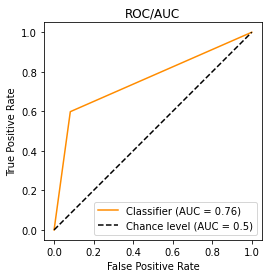

In [175]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    Y_test,
    Y_pred_xg2,
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC/AUC")
plt.legend()
plt.show()

In [ ]:
#Conclusion

'''
Xtreme Gradient Boosting gives the best accracy
The model is abel to predict the majority class (income > 50K) with a precision of 88%
The model is abel to predict the minority class (income <= 50K) with a precision of 70%
The overall accuracy of the model is 84%
'''